In [2]:
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SSPIA1/main/9%20Funciones%20de%20penalizaci%C3%B3n/C%C3%B3digos/Plot_Contour.py'
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SSPIA1/main/9%20Funciones%20de%20penalizaci%C3%B3n/C%C3%B3digos/Plot_Surf.py'

import matplotlib.pyplot as plt
import numpy as np
from Plot_Surf import *
from Plot_Contour import *
from IPython import display

--2023-10-27 00:10:23--  https://raw.githubusercontent.com/Jegovila/SSPIA1/main/9%20Funciones%20de%20penalizaci%C3%B3n/C%C3%B3digos/Plot_Contour.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 649 [text/plain]
Saving to: ‘Plot_Contour.py’

Plot_Contour.py     100%[===================>]     649  --.-KB/s    in 0s      

2023-10-27 00:10:23 (14.8 MB/s) - ‘Plot_Contour.py’ saved [649/649]

--2023-10-27 00:10:23--  https://raw.githubusercontent.com/Jegovila/SSPIA1/main/9%20Funciones%20de%20penalizaci%C3%B3n/C%C3%B3digos/Plot_Surf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP 

Penalización

In [3]:
def Penalty(x, xl, xu):
    D = x.size
    z = 0

    for j in range(D):
        if x[j] < xl[j]:
            z = z + 1
        elif x[j] > xu[j]:
            z = z + 1
        else:
            z = z + 0

    #for j in range(D):
    #    if x[j] < xl[j]:
    #        z = z + (x[j]-xl[j]) ** 2
    #    elif x[j] > xu[j]:
    #        z = z + (x[j] - xu[j]) ** 2
    #    else:
    #        z = z + 0

    return z

Función objetivo

In [4]:
f = lambda x, y: np.sin(x+y) + (x-y) ** 2 - 1.5 * x + 2.5 * y+1 # McCormick Function
fp = lambda x, xl, xu: f(x[0], x[1]) + 1000 * Penalty(x, xl, xu);

Parámetros

In [13]:
xl = np.array([-1.5, -3])
xu = np.array([4, 4])


G = 30
N = 50
D = 2

F = 0.6
CR = 0.9

x = np.zeros((D, N))
fitness = np.zeros(N)

# DE

En la etapa de selección, cambiar la función objetivo si se quiere con o sin penalización

Mínimo global en x= -0.547168163087369  y= -1.5475159245601375  f(x,y)= -1.9132227978830425


<Figure size 640x480 with 0 Axes>

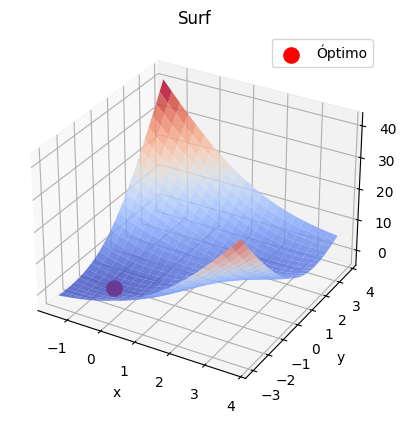

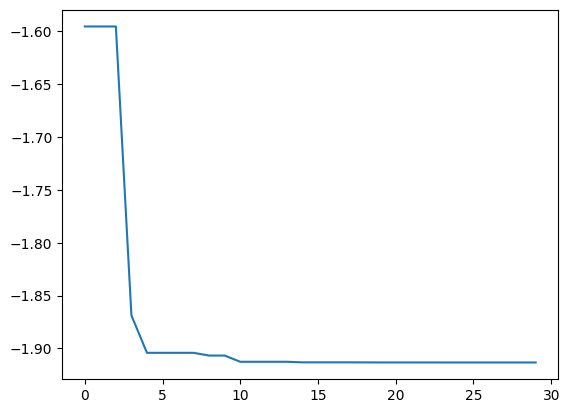

In [14]:
for i in range(N):
    x[:, i] = xl + (xu - xl) * np.random.rand(D)
    fitness[i] = f(x[0, i], x[1, i])

fx_plot = np.zeros(G)

for n in range(G):
    display.display(plt.gcf())
    display.clear_output(wait=True)
    #plot_contour(f, x, xl, xu)

    for i in range(N):
        # Mutación
        r1 = i
        while r1 == i:
            r1 = np.random.randint(N)

        r2 = r1
        while r2 == r1 or r2 == i:
            r2 = np.random.randint(N)

        r3 = r2
        while r3 == r2 or r3 == r1 or r3 == i:
            r3 = np.random.randint(N)

        v = x[:, r1] + F * (x[:, r2] - x[:, r3])

        # Recombinación
        u = np.zeros(D)

        for j in range(D):
            r = np.random.rand()

            if r <= CR:
                u[j] = v[j]
            else:
                u[j] = x[j, i]

        # Selección

        ## ------- Tercer método
        #for j in range(D):
          ## ---- A ---- ##

          #if xu[j] > u[j] > xl[j]:
          #    pass
          #else:
          #    u[j] = xl[j] + (xu[j] - xl[j]) * np.random.rand()

          ## ---- B ----- ##

          #if u[j] > xu[j]:
          #  u[j] = xu[j]
          #elif u[j] < xl[j]:
          #  u[j] = xl[j]



        ## ---------- SIN PENALIZAR--------------- ##
        #fitness_u = f(u[0], u[1])
        ## ---------- CON PENALIZACIÓN--------------- ##
        fitness_u = fp(u, xl, xu)

        if fitness_u < fitness[i]:
            x[:,i] = u
            fitness[i] = fitness_u

    fx_plot[n] = np.min(fitness)

igb = np.argmin(fitness)

print("Mínimo global en x=", x[0, igb], " y=", x[1, igb], " f(x,y)=", f(x[0, igb], x[1, igb]))
plot_surf(f, x, xl, xu, igb)
plt.plot(fx_plot)